In [1]:
import warnings

warnings.filterwarnings("ignore")

# Libraries to help with re
import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# To build model for prediction
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

# To save the models
import pickle

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

## Loading the data

In [2]:
data = pd.read_csv('Fertilizer_Prediction.csv')

In [3]:
data.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Temparature      99 non-null     int64 
 1   Humidity         99 non-null     int64 
 2   Moisture         99 non-null     int64 
 3   Soil Type        99 non-null     object
 4   Crop Type        99 non-null     object
 5   Nitrogen         99 non-null     int64 
 6   Potassium        99 non-null     int64 
 7   Phosphorous      99 non-null     int64 
 8   Fertilizer Name  99 non-null     object
dtypes: int64(6), object(3)
memory usage: 7.1+ KB


In [6]:
data.shape

(99, 9)

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Temparature,99.0,30.282828,3.502304,25.0,28.0,30.0,33.0,38.0
Humidity,99.0,59.151515,5.840331,50.0,54.0,60.0,64.0,72.0
Moisture,99.0,43.181818,11.271568,25.0,34.0,41.0,50.5,65.0
Nitrogen,99.0,18.909091,11.599693,4.0,10.0,13.0,24.0,42.0
Potassium,99.0,3.383838,5.814667,0.0,0.0,0.0,7.5,19.0
Phosphorous,99.0,18.606061,13.476978,0.0,9.0,19.0,30.0,42.0


In [8]:
# copying data to another variable to avoid any changes to original data
df = data.copy()

In [9]:
df['Soil Type'].unique()

array(['Sandy', 'Loamy', 'Black', 'Red', 'Clayey'], dtype=object)

In [11]:
df['Soil Type'].value_counts()

Loamy     21
Sandy     20
Clayey    20
Black     19
Red       19
Name: Soil Type, dtype: int64

In [10]:
df['Crop Type'].unique()

array(['Maize', 'Sugarcane', 'Cotton', 'Tobacco', 'Paddy', 'Barley',
       'Wheat', 'Millets', 'Oil seeds', 'Pulses', 'Ground Nuts'],
      dtype=object)

In [12]:
df['Crop Type'].value_counts()

Sugarcane      13
Cotton         12
Millets        11
Paddy          10
Pulses         10
Wheat           9
Tobacco         7
Barley          7
Oil seeds       7
Ground Nuts     7
Maize           6
Name: Crop Type, dtype: int64

In [13]:
df.isnull().sum()

Temparature        0
Humidity           0
Moisture           0
Soil Type          0
Crop Type          0
Nitrogen           0
Potassium          0
Phosphorous        0
Fertilizer Name    0
dtype: int64

In [14]:
# Taking a look at the fertilizer name column
df['Fertilizer Name'].head(10)

0        Urea
1         DAP
2    14-35-14
3       28-28
4        Urea
5    17-17-17
6       20-20
7        Urea
8       28-28
9    14-35-14
Name: Fertilizer Name, dtype: object

In [15]:
df['Fertilizer Name'].value_counts()

Urea        22
DAP         18
28-28       17
14-35-14    14
20-20       14
17-17-17     7
10-26-26     7
Name: Fertilizer Name, dtype: int64

## Exploratory Data Analysis

In [19]:
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [25]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<Axes: xlabel='Soil Type', ylabel='count'>

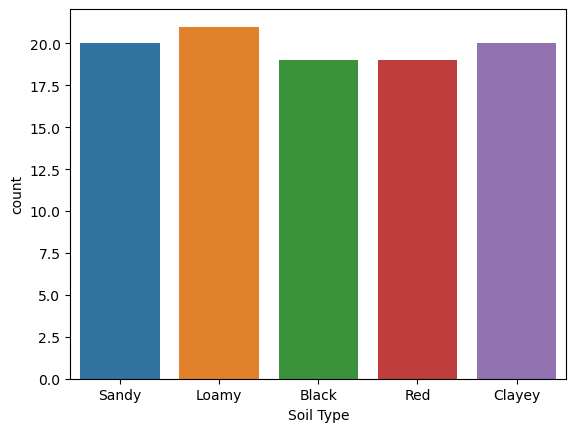

In [16]:
sns.countplot(x='Soil Type', data = df)

<Axes: xlabel='Crop Type', ylabel='count'>

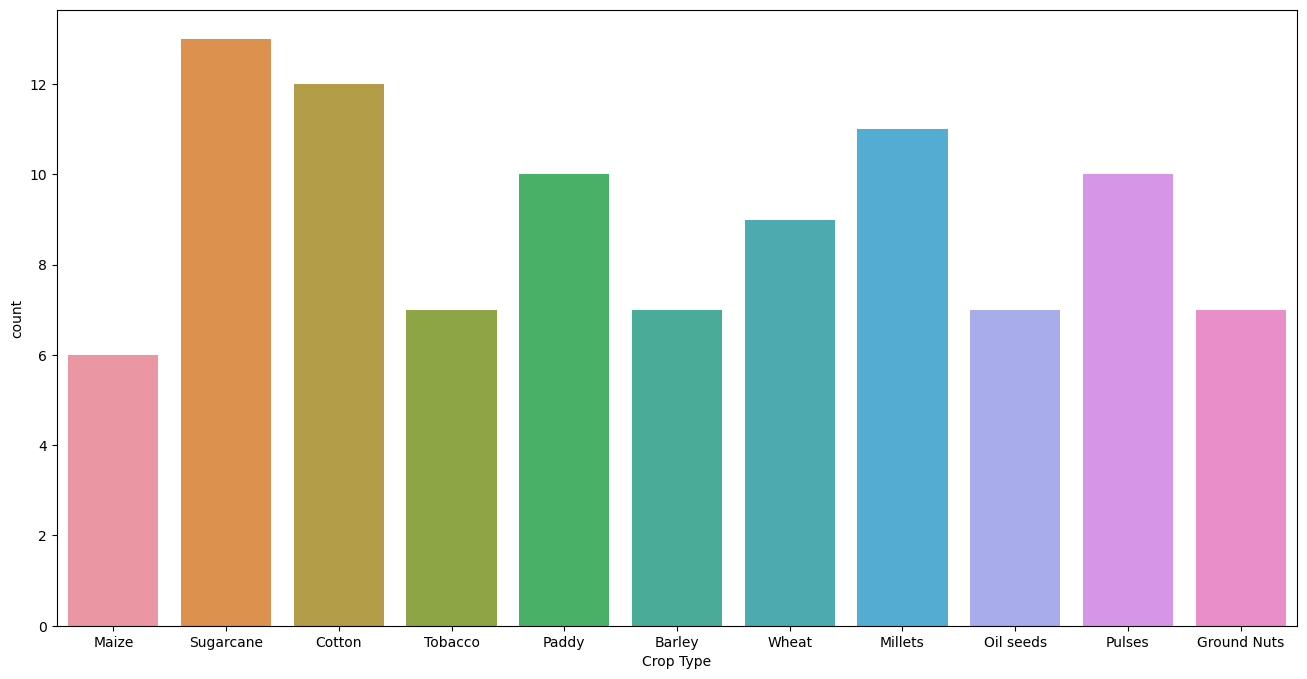

In [17]:
plt.figure(figsize=(16,8))
sns.countplot(x='Crop Type', data = df)

<Axes: xlabel='Fertilizer Name', ylabel='count'>

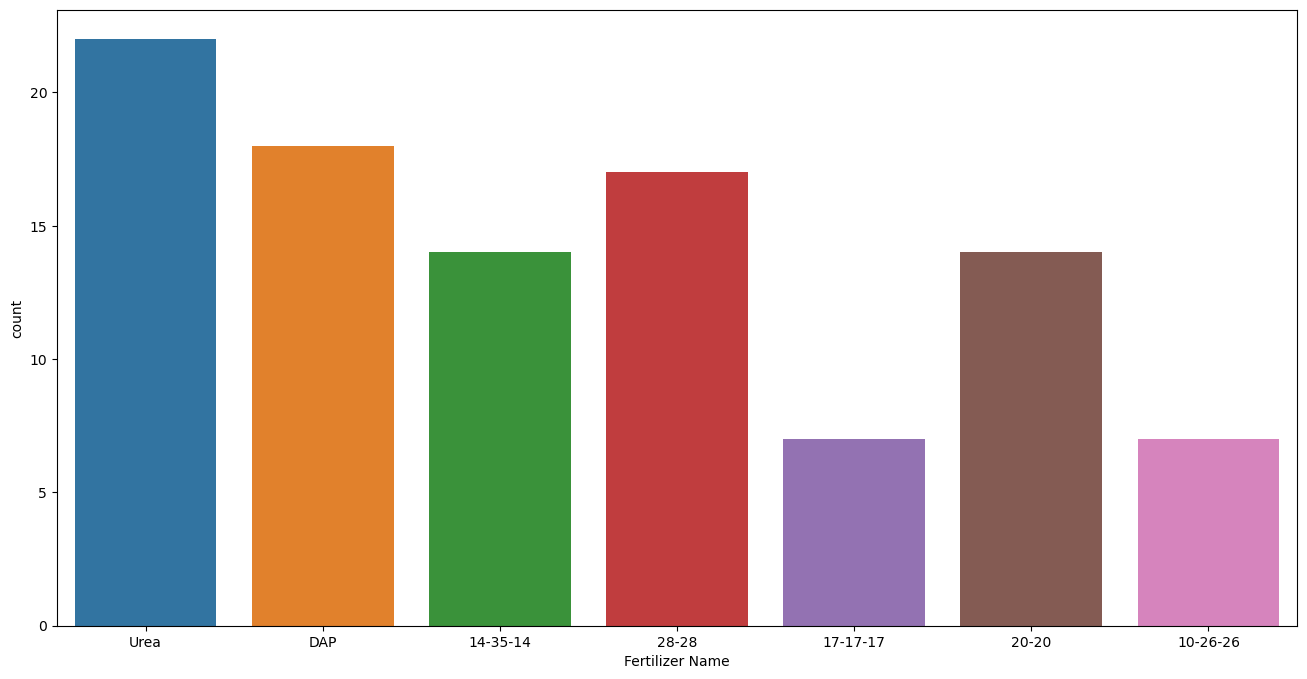

In [18]:
plt.figure(figsize=(16,8))
sns.countplot(x='Fertilizer Name', data = df)

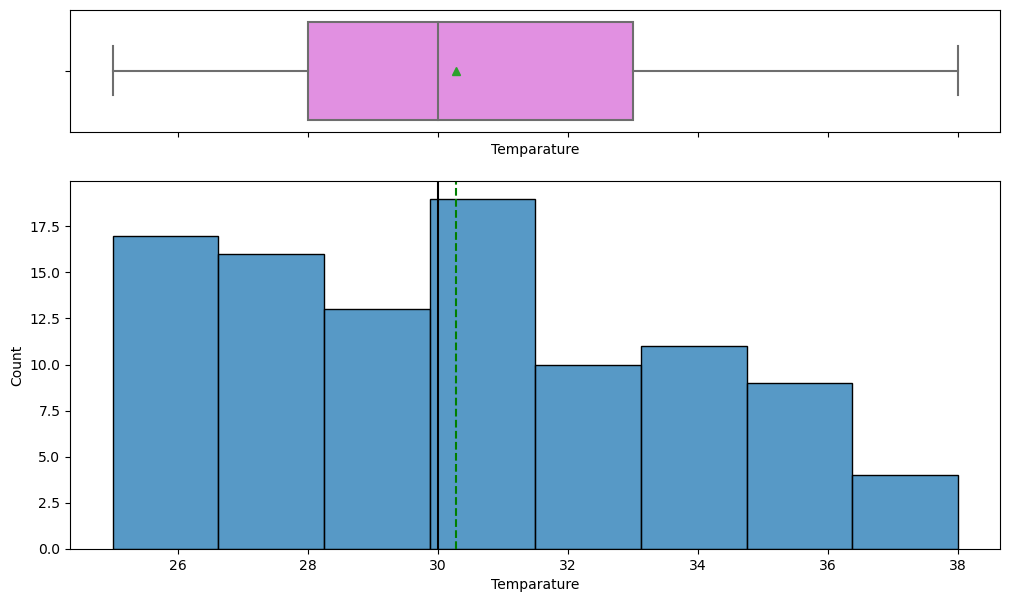

In [21]:
histogram_boxplot(df, "Temparature")

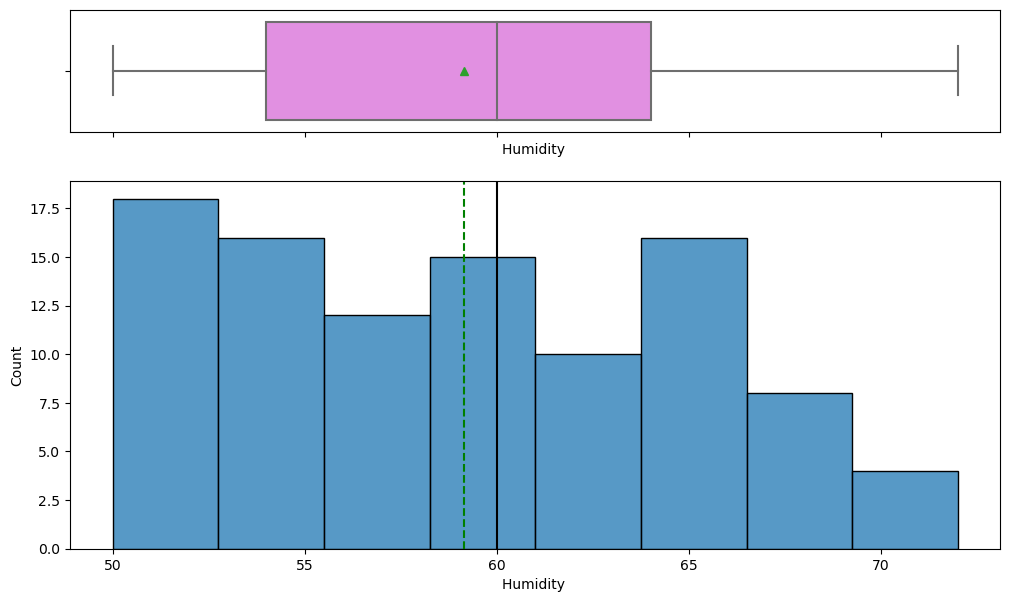

In [23]:
histogram_boxplot(df, "Humidity ")

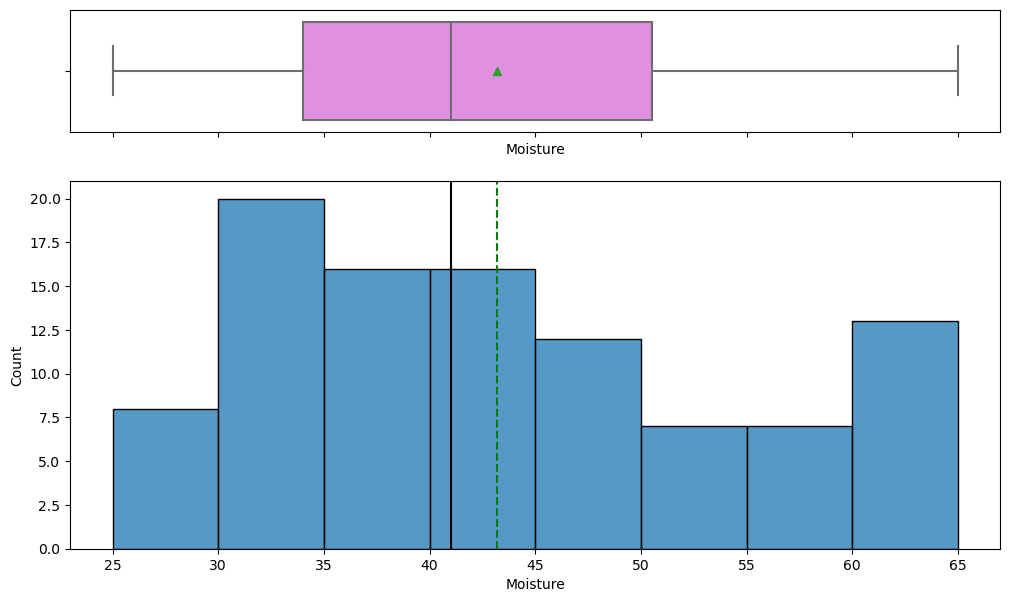

In [24]:
histogram_boxplot(df, "Moisture")

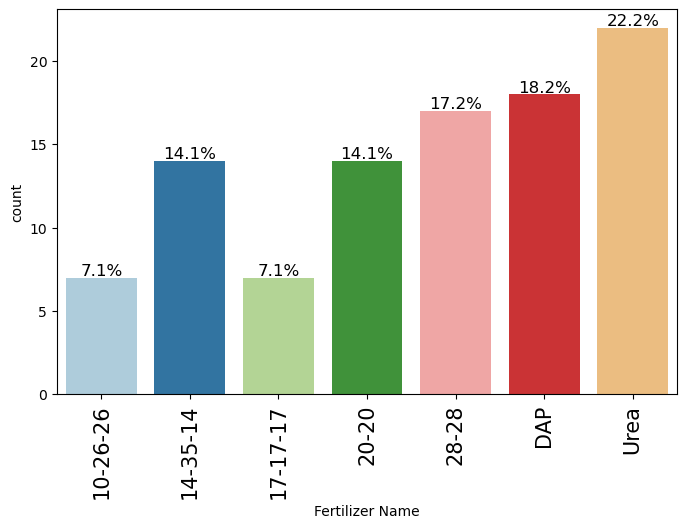

In [28]:
labeled_barplot(df, "Fertilizer Name", perc=True)

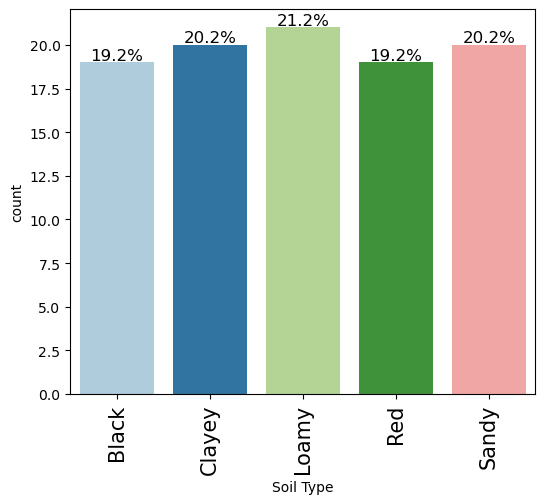

In [29]:
labeled_barplot(df, "Soil Type", perc=True)

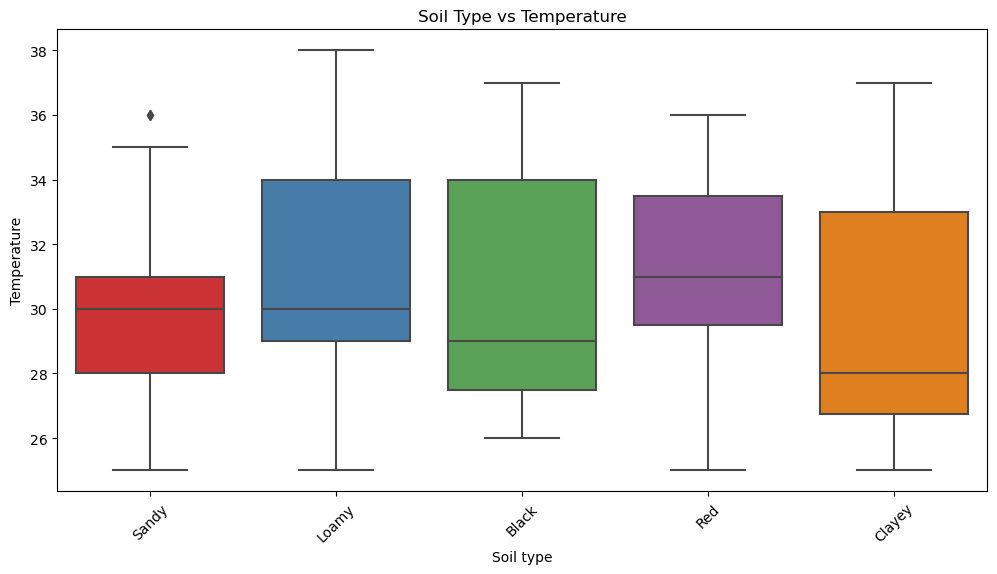

In [32]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Soil Type', y='Temparature', data=df, palette='Set1')
plt.title('Soil Type vs Temperature')
plt.xlabel('Soil type')
plt.ylabel('Temperature')
plt.xticks(rotation=45)
plt.show()

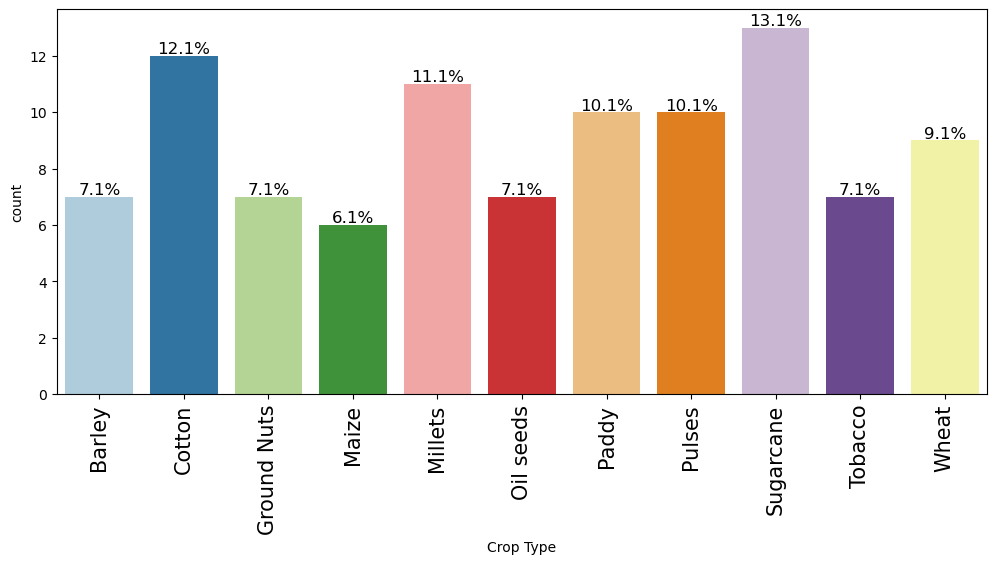

In [33]:
labeled_barplot(df, "Crop Type", perc=True)

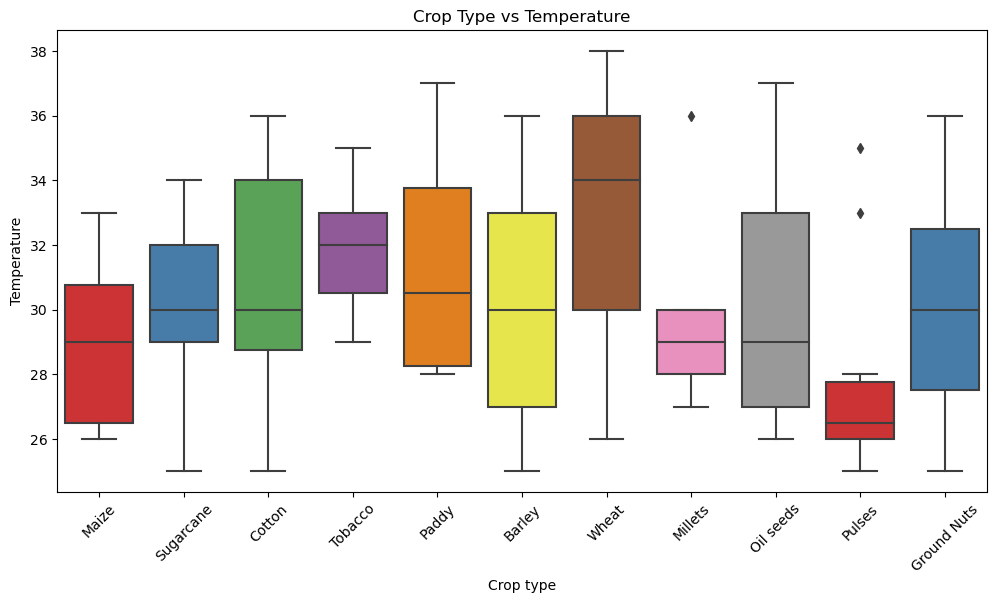

In [34]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Crop Type', y='Temparature', data=df, palette='Set1')
plt.title('Crop Type vs Temperature')
plt.xlabel('Crop type')
plt.ylabel('Temperature')
plt.xticks(rotation=45)
plt.show()

## Data Preparation

In [35]:
df.columns

Index(['Temparature', 'Humidity ', 'Moisture', 'Soil Type', 'Crop Type',
       'Nitrogen', 'Potassium', 'Phosphorous', 'Fertilizer Name'],
      dtype='object')

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Temparature      99 non-null     int64 
 1   Humidity         99 non-null     int64 
 2   Moisture         99 non-null     int64 
 3   Soil Type        99 non-null     object
 4   Crop Type        99 non-null     object
 5   Nitrogen         99 non-null     int64 
 6   Potassium        99 non-null     int64 
 7   Phosphorous      99 non-null     int64 
 8   Fertilizer Name  99 non-null     object
dtypes: int64(6), object(3)
memory usage: 7.1+ KB


In [37]:
# Categorical column preprocessing
le = LabelEncoder()
df['Soil Type'] = le.fit_transform(df['Soil Type'])
df['Crop Type'] = le.fit_transform(df['Crop Type'])
df['Fertilizer Name'] = le.fit_transform(df['Fertilizer Name'])

In [38]:
df.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,4,3,37,0,0,6
1,29,52,45,2,8,12,0,36,5
2,34,65,62,0,1,7,9,30,1
3,32,62,34,3,9,22,0,20,4
4,28,54,46,1,6,35,0,0,6


In [39]:
df.dtypes

Temparature        int64
Humidity           int64
Moisture           int64
Soil Type          int32
Crop Type          int32
Nitrogen           int64
Potassium          int64
Phosphorous        int64
Fertilizer Name    int32
dtype: object

In [40]:
# Preparing the data
X = df.drop("Fertilizer Name", axis=1)

Y = df["Fertilizer Name"]


# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

In [41]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (69, 8)
Shape of test set :  (30, 8)
Percentage of classes in training set:
6    0.217391
4    0.202899
5    0.188406
3    0.144928
1    0.130435
2    0.057971
0    0.057971
Name: Fertilizer Name, dtype: float64
Percentage of classes in test set:
6    0.233333
1    0.166667
5    0.166667
3    0.133333
0    0.100000
4    0.100000
2    0.100000
Name: Fertilizer Name, dtype: float64


# Model Building

## SVM

In [42]:
# Creating and training the SVM model
svm_fertilizer_model = SVC(kernel='rbf', random_state=1)  
svm_fertilizer_model.fit(X_train, y_train)

SVC(random_state=1)

In [44]:
y_pred = svm_fertilizer_model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2%}")

# Classification Report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

Accuracy: 60.00%
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.00      0.00      0.00         5
           2       0.00      0.00      0.00         3
           3       0.75      0.75      0.75         4
           4       0.60      1.00      0.75         3
           5       0.50      1.00      0.67         5
           6       1.00      1.00      1.00         7

    accuracy                           0.60        30
   macro avg       0.41      0.54      0.45        30
weighted avg       0.48      0.60      0.52        30



## Random Forest

In [46]:
RF_fertilizer = RandomForestClassifier(n_estimators=20, random_state=4)
RF_fertilizer.fit(X_train,y_train)

RandomForestClassifier(n_estimators=20, random_state=4)

In [47]:
y_pred = RF_fertilizer.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2%}")

# Classification Report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

Accuracy: 100.00%
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         7

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [49]:
from sklearn.model_selection import cross_val_score
#Cross validation score
scores = cross_val_score(RF_fertilizer, X, Y, cv=5, scoring='accuracy') 

print("Cross-validated Accuracy:", scores)
print("Mean Accuracy:", scores.mean())
print("Standard Deviation of Accuracy:", scores.std())

Cross-validated Accuracy: [0.9  1.   1.   0.95 1.  ]
Mean Accuracy: 0.97
Standard Deviation of Accuracy: 0.039999999999999994


In [50]:
# Save the Random Forest model to a file using pickle
rf_fertilizer_model_path = 'random_forest_fertilizer.pkl'
with open(rf_fertilizer_model_path, 'wb') as file:
    pickle.dump(RF_fertilizer, file)

print(f"Random Forest model saved to {rf_fertilizer_model_path}")

Random Forest model saved to random_forest_fertilizer.pkl
